## Final Project Submission

Please fill out:
* Student name: Miya Kusumoto
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Eli Thomas
* Blog post URL:


## Project Overview

I want to see if I can predict demographics of a city/specific zipcode based on the number of coffee shops, breweries, restaurants, grocery stores in a specific zip code. 

Do cities that are more active on yelp (with restaurants with higher average numbers of reviews) have a younger population? 

* Connect to Yelp API
* Explore Yelp methods/ data that I can get
* Import demographic data


In [19]:
##import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import skew

import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from dotenv import load_dotenv
load_dotenv()

import os
import requests
import time

In [2]:
#import yelp API credentials

client_id = os.getenv("client_id")
api_key = os.getenv("api_key")

In [20]:
#testing to make sure connection works

def yelp_call(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    
    df = pd.DataFrame(response.json()['businesses'])
    return df

def all_results(url_params, api_key):
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    dfs = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        dfs.append(yelp_call(url_params, api_key))
        time.sleep(1) #Wait a second
        cur += 50
    df = pd.concat(dfs, ignore_index=True)
    return df

#term = 'pizza'
location = 'Dallas'
url_params = {  #'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }
df = all_results(url_params, api_key)
print(len(df))
df.head()

3700 total matches found.
1000


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,pecan-lodge-dallas-3,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 32.7835884, 'longitude': -96.7838...",(214) 748-8900,6357.232139,ycL1qii6EpKXoLgMMboBIQ,https://s3-media3.fl.yelpcdn.com/bphoto/9aPP6D...,False,"{'address1': '2702 Main St', 'address2': '', '...",Pecan Lodge,+12147488900,$$,4.5,4502,[],https://www.yelp.com/biz/pecan-lodge-dallas-3?...
1,velvet-taco-dallas,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 32.8216823671486, 'longitude': -9...",(214) 823-8358,2394.176839,GbKN-edIpqhNXH_iItk04w,https://s3-media3.fl.yelpcdn.com/bphoto/zvupNz...,False,"{'address1': '3012 N Henderson Ave', 'address2...",Velvet Taco,+12148238358,$,4.5,2592,"[delivery, pickup]",https://www.yelp.com/biz/velvet-taco-dallas?ad...
2,meso-maya-comida-y-copas-dallas-4,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 32.7876872301983, 'longitude': -9...",(214) 484-6555,5725.338433,vwQnJlj90NgYbbbVLQSpFg,https://s3-media2.fl.yelpcdn.com/bphoto/CvCM2s...,False,"{'address1': '1611 Mckinney Ave', 'address2': ...",Meso Maya Comida Y Copas,+12144846555,$$,4.5,2046,[],https://www.yelp.com/biz/meso-maya-comida-y-co...
3,uchi-dallas,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 32.7968594931252, 'longitude': -9...",(214) 855-5454,4723.460454,CPQEBDq7cspBB_AFYHvTDw,https://s3-media3.fl.yelpcdn.com/bphoto/poj8fL...,False,"{'address1': '2817 Maple Ave', 'address2': '',...",Uchi,+12148555454,$$$,4.5,1174,[],https://www.yelp.com/biz/uchi-dallas?adjust_cr...
4,maple-leaf-diner-dallas,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 32.92347, 'longitude': -96.80524}",(214) 434-1626,9375.606691,aH3iLs5URV5sY-kNKVFyLA,https://s3-media2.fl.yelpcdn.com/bphoto/ZG7N9K...,False,"{'address1': '12817 Preston Rd', 'address2': '...",Maple Leaf Diner,+12144341626,$$,4.5,1993,[],https://www.yelp.com/biz/maple-leaf-diner-dall...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20838358>,
      dtype=object)

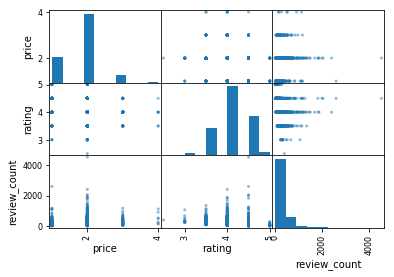

In [21]:
df.price = df.price.fillna(value=0)
price_dict = {"$": 1, "$$":2, "$$$": 3, "$$$$":4}
df.price = df.price.map(price_dict)

pd.plotting.scatter_matrix(df[['price', 'rating', 'review_count']])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
alias            1000 non-null object
categories       1000 non-null object
coordinates      1000 non-null object
display_phone    1000 non-null object
distance         1000 non-null float64
id               1000 non-null object
image_url        1000 non-null object
is_closed        1000 non-null bool
location         1000 non-null object
name             1000 non-null object
phone            1000 non-null object
price            953 non-null float64
rating           1000 non-null float64
review_count     1000 non-null int64
transactions     1000 non-null object
url              1000 non-null object
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 118.2+ KB


In [32]:
df["location"][1]["zip_code"]

#split up addresses so I can view zip codes
def address_split(location_dictionary):
    

'75206'